In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [19]:
import tensorflow as tf
# Number of available GPUs to tensorflow
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [22]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(
  mean=None,
  n_samples=N,
  n_features=2,
  n_classes=2,
  shuffle=True,
  random_state=None
)

X, Y = gaussian_quantiles

In [25]:
X.shape

(1000, 2)

In [26]:
Y.shape

(1000,)

In [27]:
Y = Y[:, np.newaxis]

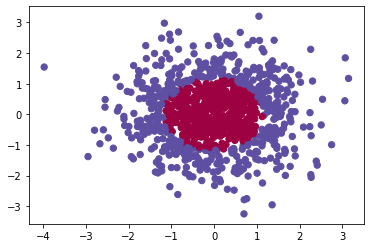

In [28]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

## Funciones de activacion

In [30]:
def sigmoid(x, derivate=False):
  if derivate:
    return np.exp(-x)/((np.exp(-x) + 1)**2)
  else:
    return 1 / (1 + np.exp(-x))


def relu(x, derivate=False):
  if derivate:
    x[x <= 0] = 0
    x[x > 0] = 1
    return x
  else:
    return np.maximum(0, x)


## Funciones de perdida

In [31]:
def mse(y, y_hat, derivate=False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)


In [37]:
def initialize_paramters_deep(layers_dim):
  parameters = {}
  L = len(layers_dim)
  for l in range(0, L -1):
    parameters['W'+str(l+1)] = (np.random.rand(layers_dim[l],
                                               layers_dim[l+1]))*2 - 1
    parameters['b'+str(l+1)] = (np.random.rand(1,layers_dim[l+1]))*2 - 1
  return parameters


In [34]:
(np.random.rand(10, 3) * 2) -1

array([[-0.09921538,  0.14375441,  0.99360508],
       [-0.32373183, -0.74107792, -0.13559006],
       [ 0.67652961,  0.42884576,  0.94855813],
       [-0.3772834 , -0.49747605, -0.77958523],
       [-0.08594112,  0.33031246, -0.05233302],
       [ 0.88874166,  0.04556016,  0.61087427],
       [-0.95691905,  0.59732616, -0.39014521],
       [-0.23165775,  0.93464919, -0.95866234],
       [ 0.23972528,  0.44484845,  0.44976821],
       [-0.04216922,  0.69552504,  0.42035221]])

In [38]:
layers_dim = [2,3,8,1]

params = initialize_paramters_deep(layers_dim)
print(params)

{'W1': array([[-0.093011  ,  0.31162128,  0.57792942],
       [-0.497648  ,  0.60277223, -0.27341549]]), 'b1': array([[-0.66909841, -0.88161288,  0.70610272]]), 'W2': array([[ 0.80596983, -0.50674919,  0.8517682 , -0.63883641, -0.96284366,
         0.07444935,  0.17765137, -0.50750147],
       [-0.41822846,  0.05194924, -0.16321289,  0.45146599, -0.94039761,
         0.08006833, -0.47404473, -0.41750927],
       [-0.01610519,  0.92074409,  0.4199378 , -0.40645921, -0.26651504,
        -0.4324387 ,  0.42536897, -0.98860309]]), 'b2': array([[ 0.67635145,  0.93792065, -0.03727051,  0.93459755,  0.63986986,
        -0.10185958,  0.62169525,  0.95719909]]), 'W3': array([[ 0.0711573 ],
       [-0.90693268],
       [ 0.65449611],
       [ 0.84632786],
       [-0.86124903],
       [-0.89058641],
       [-0.9380887 ],
       [-0.72098284]]), 'b3': array([[0.73465917]])}
